# Integrated Project 1

## Content

1. [Introduction](#intro)
2. [General information and Preprocessing data](#general)
3. [Exploration Analyze](#explore)
4. [Consumer Profile by Regions](#profile)
5. [Consumer Profile by Regions](#"profile")
6. [Hypothesis](#"hypo")
7. [Conclusion](#conclusion)

## Introduction <a href = 'intro'></a>

You work for the online store, which sells videogames all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This allows you to put your money on a potentially hot new item and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board). The ESRB evaluates a game's content and assigns an appropriate age categories, such as Teen and Mature.

- Name - name of a game
- Platform - name of platform
- Year_of_Release
- Genre
- NA_sales — sales in North America (millions copies)
- EU_sales — sales in Europe(millions copies)
- JP_sales — sales iin Japan (millions of copies)
- Other_sales — sales in other countries (millions copies)
- Critic_Score — (max 100)
- User_Score — оценка пользователей (max 10)
- Rating

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## General information and Preprocessing data <a href = 'general'></a>

*Open file*

In [98]:
try:
    games_data = pd.read_csv('games.csv')
except:
    games_data = pd.read_csv('/datasets/games.csv')

*General information*

In [99]:
games_data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11728,Conflict: Desert Storm,GC,2003.0,Shooter,0.06,0.02,0.00,0.00,62.0,8.4,T
10803,Jikkyou Powerful Pro Yakyuu 11,GC,2004.0,Sports,0.00,0.00,0.09,0.00,NaN,NaN,NaN
6458,Marvel Super Hero Squad: The Infinity Gauntlet,Wii,2010.0,Action,0.21,0.04,0.00,0.02,49.0,tbd,E10+
1327,SingStar Pop,PS2,2007.0,Misc,0.04,1.08,0.00,0.32,73.0,7.5,E10+
7407,The Wolf Among Us,PS4,2014.0,Adventure,0.10,0.07,0.00,0.04,83.0,8.4,M
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E
2469,Harry Potter and the Order of the Phoenix,DS,2007.0,Action,0.28,0.46,0.00,0.10,51.0,4.9,E
15905,Tsuyo Kiss 2 Gakki: Swift Love,PS2,2009.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13635,Guild Wars Trilogy,PC,2005.0,Role-Playing,0.00,0.03,0.00,0.01,NaN,8.8,T
952,Kirby: Triple Deluxe,3DS,2014.0,Platform,0.61,0.34,0.79,0.09,80.0,8.8,E


In [100]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [101]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [102]:
games_data.duplicated().sum()

0

#### Intermediate conclusion

We have database with 12 columns and 16715 entries. First column has no name and is not responded. Let's say that it is id of row.

Before we start analytical work we need to make database 'beautiful'.

1. Change fontsize of columns' names;

2. Convert datatypes:
-  User_Score (object -> int);

3. We have missing data. Need to think to fill it or not and if fill than with which data.

4. No duplicates

*Preprocessing data*

In [103]:
# games_data.columns = [c.lower() for c in list(games_data.columns)]
# games_data

In [104]:
games_data.columns = games_data.columns.str.lower()
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*Year_of_Release*

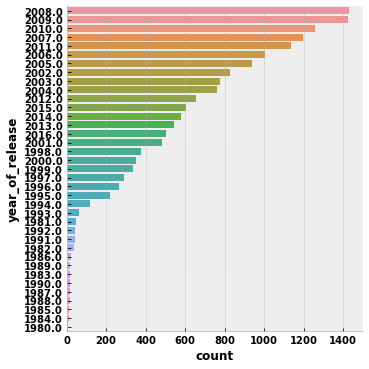

In [105]:
sns.catplot(y='year_of_release', data=games_data, kind='count', order=games_data.year_of_release.value_counts().index);

In [106]:
games_data['year_of_release'].isna().sum()

269

#### Intermediate conclusion

We have games which was released from 1980 to 2016 years. Most of the games were released in 2008-2009 years. From 1980 to 1993 games' production was just in the beginning that's way we have so small amount of released games.

There is a missing data in this column. To fill it with propria year we need to find each game without year and ask google when it was released. 269 items - takes a lot of time. Leave for now as it is.

*User_Score*


In [107]:
games_data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [108]:
games_data['user_score'].isna().sum()

6701

In [109]:
tbd = games_data['user_score'] != 'tbd'
games_data['user_score'].where(tbd, np.nan, inplace=True)

In [110]:
games_data['user_score'] = games_data['user_score'].fillna(value=-1)

In [111]:
games_data['user_score'] = games_data['user_score'].astype(float)

In [112]:
games_data['user_score'].value_counts()



-1.0    9125
 7.8     324
 8.0     290
 8.2     282
 8.3     254
        ... 
 1.5       2
 0.3       2
 1.1       2
 0.0       1
 9.7       1
Name: user_score, Length: 96, dtype: int64

#### Intermediate conclusion
In this column we had missing data, it can be a mistake during getting data and also it can mean that gamers didn't score it. Also we have score 'tbd'. As usual tbd means "To Be Determined". What exactly it means here not clear. Changed for 0

*Name*

In [113]:
games_data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [114]:
games_data['name'] = games_data['name'].fillna(value="Unknown")

In [115]:
need_for_speed = pd.DataFrame(games_data.loc[games_data['name'] == 'Need for Speed: Most Wanted'])
need_for_speed

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,-1.0,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,-1.0,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,-1.0,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


#### Intermediate conclusion
In this data we had missed two names. We can delete this data, but I changed it to "Unknown".

Was checked why one of the games repeated 12 times. Game was released for almost all platforms and reissued several times. This can be valid for other games that have more than 1-3 releases.

*Platform*

In [116]:
games_data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

#### Intermediate conclusion

Most of the games that was sold is for platform PS2. But in 2013 production of PS2 was stopped. That means, that sales will be decreasing. We can intend that there will be increasing sales of PS3 and/or PS4.

*Genre*

In [117]:
games_data['genre'] = games_data['genre'].fillna(value='Unknown')

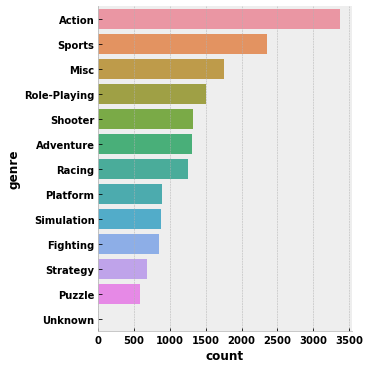

In [118]:
sns.catplot(y='genre', data=games_data, kind='count', order=games_data.genre.value_counts().index);

#### Intermediate conclusion

The most popular genre is Action. The most not popular are Strategy and Puzzle.

*Critic_Score*

In [119]:
games_data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64

In [120]:
games_data['critic_score'] = games_data['critic_score'].fillna(value=-1)

#### Intermediate conclusion
In this column we had missing data, it can be a mistake during getting data and also it can mean that gamers didn't score it. Changed for 0

*Rating*

In [121]:
games_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [122]:
games_data['rating'] = games_data['rating'].fillna(value="Unknown")

In [123]:
games_data.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

#### Intermediate conclusion
Missing data is filled with 'Unknown'.

*Total*

In [124]:
games_data['total_sales'] = games_data.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [125]:
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,111.50
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,43.82
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,48.28
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,40.27
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,Unknown,0.02
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,Unknown,0.01


#### Intermediate conclusion
Was counted total sum of sales for each position in data.

### Conclusion <a href = "conclusion_prep"></a>

In columns 'name', 'genre', critical_score', 'user_score' and 'rating' was filled missing data.
In a column 'year_of_release' we leave missing data.
Was counted and added information about total sales income for each game in database

### Exploration Analyze <a href = "explore"></a>

*Games per years*

In [126]:
games_per_year = (
    games_data[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

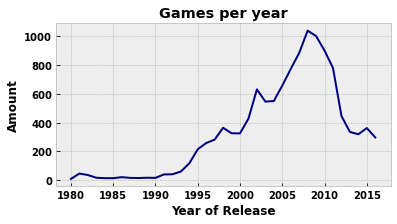

In [127]:
plt.style.use('bmh')

(
    games_per_year
        .plot(figsize=(6, 3), colormap='jet', legend=False, title='Games per year')
        .set(xlabel='Year of Release', ylabel='Amount')
)

plt.show()

#### Intermediate conclusion

In 1980 - 1990 years there is no growth. It is a begging of videogames production. Not so many companies were producing videogames and not everyone have a posibility to buy them.
Since 1990 till 2008-2009 years we have growth. As we saw before peak in 2008-2009 yeas. After 2009 we saw tha there was falling. In 1999-2000 and in 2003 - 2004 we can see falling in production. Don't think that this is very important information, falling is not big.

Such growth can be explained that this kind of games became more moderated and more different games were produced. Also technologies were developed and were gotten new options, like multieplayers games.

Causes of fall in producrion can be different. To finish new game as usual takes around two years or even more. Many game are plus/minus the same which is not very interesting for gamers. Some of the games related to world events, like FIFA, movies and books which is popular today.

To be sure why we have such results we need to consult with someone who is specialist in this field

*Games by platforms*

In [128]:
def total_sales_per_platform(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [129]:
def bar_plot(df, title):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
            .set(xlabel='Platform', ylabel='Sales', title=title)
    )
    plt.show()

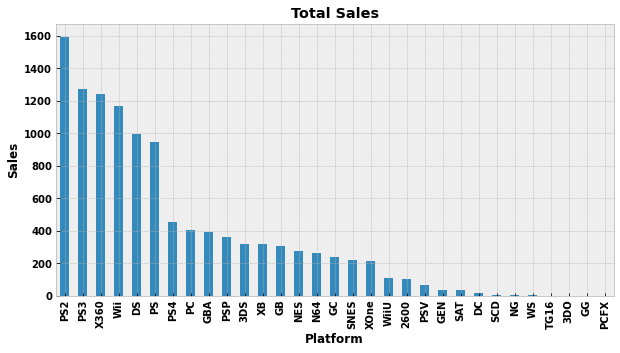

In [130]:
bar_plot(total_sales_per_platform(games_data), "Total Sales")

In [131]:
top6 = total_sales_per_platform(games_data).head(6)
top6

,total_sales
platform,
PS2,1595.06
PS3,1269.94
X360,1242.18
Wii,1169.72
DS,995.01
PS,944.47


In [132]:
def yearly_total_sales_by_platform(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

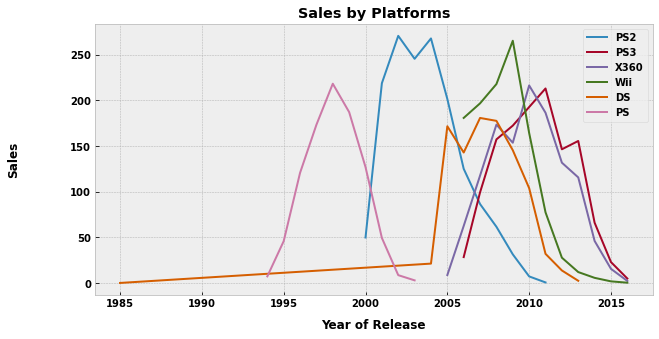

In [133]:
for platform in list(top6.index):
    yearly_total_sales_by_platform(platform, games_data)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.title('Sales by Platforms')
    plt.xlabel("Year of Release", labelpad=10)
    plt.ylabel("Sales", labelpad=50)
    plt.legend()

#### Intermediate conclusion
Each platform in use during about 10 years. Except platform Wii sales starts with a small amount. First 5 years production increasing.

*Actual years*

In [134]:
actual_years = (games_data['year_of_release'] > 2005) & (games_data['year_of_release'] <= 2015)
actual_games = games_data.loc[actual_years]

actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,111.50
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,48.28
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,43.70
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,38.94
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,38.09
...,...,...,...,...,...,...,...,...,...,...,...,...
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,-1.0,-1.0,E,0.01
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,Unknown,0.02
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,Unknown,0.00


In [135]:
actual_games['year_of_release'] = actual_games['year_of_release'].astype('int64')
actual_games

C:\Users\GALINA~1\AppData\Local\Temp/ipykernel_9156/2646870852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_games['year_of_release'] = actual_games['year_of_release'].astype('int64')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,111.50
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,43.70
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,38.94
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,38.09
...,...,...,...,...,...,...,...,...,...,...,...,...
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,-1.0,-1.0,E,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,Unknown,0.02
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1.0,-1.0,Unknown,0.00


#### Intermediate conclusion

Most of the sales/production was between 2005 and 2015, let's choose this decade.

*Leaders in sales*

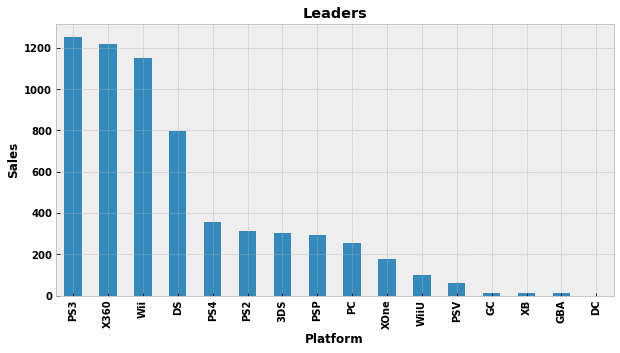

In [136]:
total_sales = total_sales_per_platform(actual_games)
bar_plot(total_sales, 'Leaders')

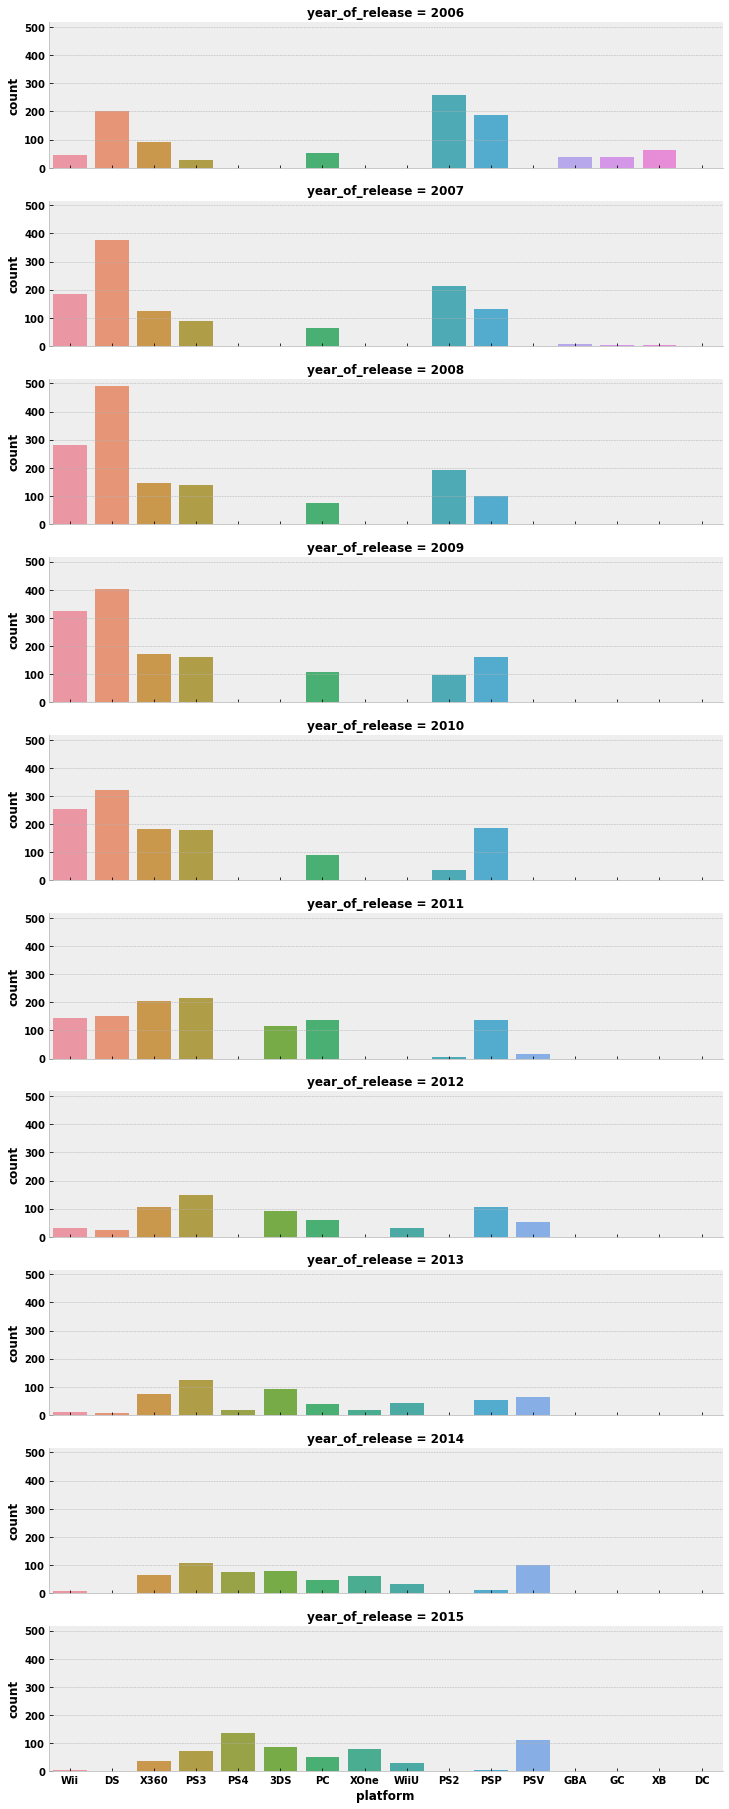

In [137]:
g = sns.catplot(x="platform", col="year_of_release", col_wrap=1,
                data=actual_games,
                kind="count", height=2.5, aspect=4)

#### Intermediate conclusion

Leaders in sales are PS3 which is not a surprise. For many years PlayStation is a leader on a market of videogames. And according that since 2013 PS2 is not produced we can see that next version on a top. That can say that in 2017 shop need to pay attention on PS4 which is new on a market and PS3 is in the end of its decade. PS4 was realisd in the end of 2016 year and already has almost 400 sales.
Not so far from PS3 in an amount of sales is X360 by XBox. Which is not a surprise also as XBox second platform for videogames on a market. Here also will be good to pay attention on next version of XBox platform XOne.

*Sales*

avg PS4: 118.06666666666666
avg XOne: 58.376666666666665


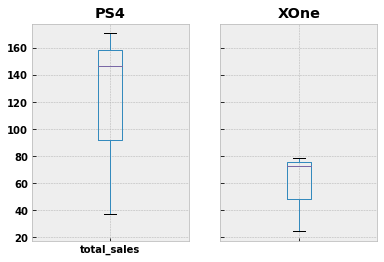

In [138]:
promising_platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

for num, platform in enumerate(promising_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"avg {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

#### Intermediate conclusion

PS4 is a leader on a market. According that PS4 and XOne were released at the same time, difference between sales is very informative.

In [139]:
ps4 = actual_games.query("platform == 'PS4'").where((actual_games['user_score'] !=-1) & (actual_games['critic_score'] !=-1))
xone = actual_games.query("platform == 'XOne'").where((actual_games['user_score'] !=-1) & (actual_games['critic_score'] !=-1))

In [140]:
scores= ['user_score', 'critic_score', 'total_sales']
ps4[scores].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.612451,0.009462
critic_score,0.612451,1.000000,0.414232
total_sales,0.009462,0.414232,1.000000


In [141]:
xone[scores].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.499502,-0.047092
critic_score,0.499502,1.000000,0.454064
total_sales,-0.047092,0.454064,1.000000


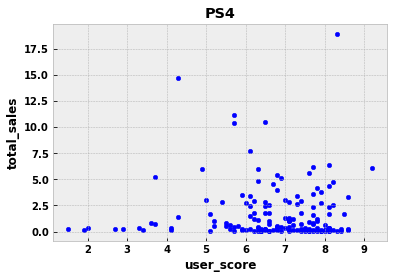

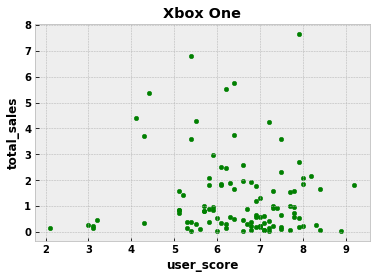

In [142]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

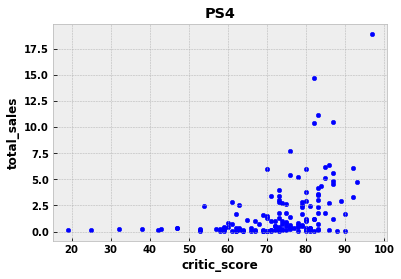

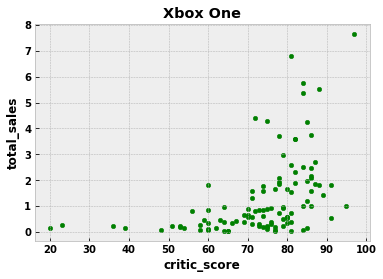

In [143]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

#### Intermediate conclusion

1. There is no correlation between user scores and sales.
2. There is a weak correlation between critical score and sales.
3. There is a correlation between user and critical scores.

Not always but very often user and critical scores are the sasme or don't have big difference, may be thats why we have between then correlation.
No correlation between user scores and sale seems interesting. Maybe users not paying attention on scores and pay attention on their personal preferences?!
The same with critical scores.

*Games by Genres*

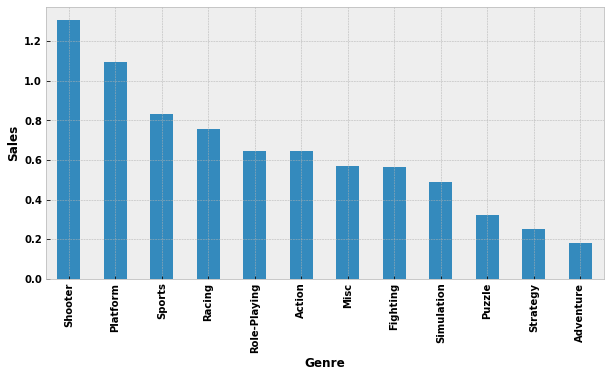

In [144]:
(actual_games
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
    .set(xlabel='Genre', ylabel='Sales'))

plt.show()

#### Intermediate conclusion

The most popular genre is 'Shooter'. The worst - 'Adventure'.

## Consumer Profile by Regions <a href = "profile"></a>

*North America*

In [145]:
region = 'na_sales'

def top5_in_region(column):
    return (
        actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )

In [146]:
def sales_by_region(data):
    (
        data
            .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
            .set(ylabel='Sales')
    )
    plt.show()

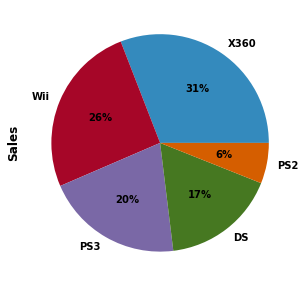

In [147]:
sales_by_region(top5_in_region('platform'))

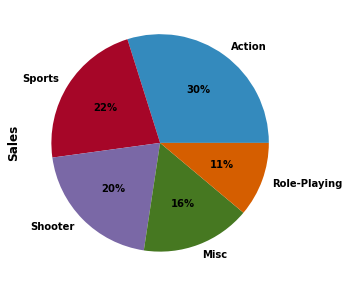

In [148]:
sales_by_region(top5_in_region('genre'))

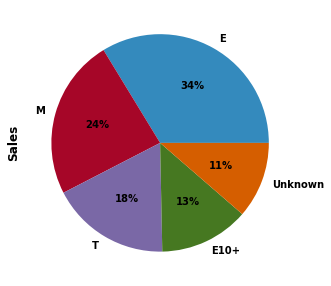

In [149]:
sales_by_region(top5_in_region('rating'))

#### Intermediate conclusion

In North America the most saleable games for a platform X360. We remember that without dividing data by regions most saleable games for a platform PS4.

The most saleable genre is Action. As we saw in previous analyze.

Games for everyone is on the top. Which is not surprising.


*Europe*

In [150]:
region = 'eu_sales'

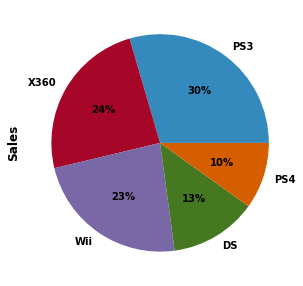

In [151]:
sales_by_region(top5_in_region('platform'))

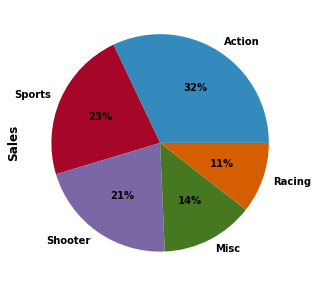

In [152]:
sales_by_region(top5_in_region('genre'))

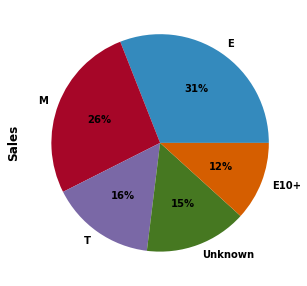

In [153]:
sales_by_region(top5_in_region('rating'))

#### Intermediate conclusion

In Europe region we see that more popular platform is PS3. As in North America in Europe more saleable action games for everyone.

*Japane*

In [154]:
region = 'jp_sales'

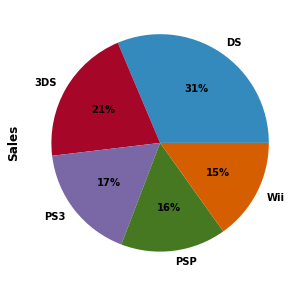

In [155]:
sales_by_region(top5_in_region('platform'))

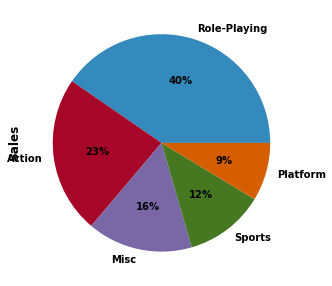

In [156]:
sales_by_region(top5_in_region('genre'))

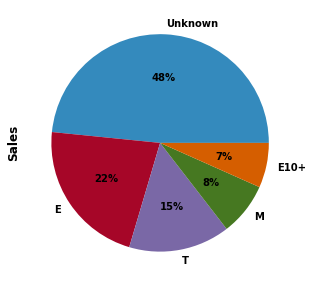

In [157]:
sales_by_region(top5_in_region('rating'))

#### Intermediate conclusion

In Japan according to diagram we can't say which ESRB most of the games have. But most popular genre is "Role-Playing" and platform - DS.

I don't know exactly what is DS platform.

*Other regions*

In [158]:
region = 'other_sales'

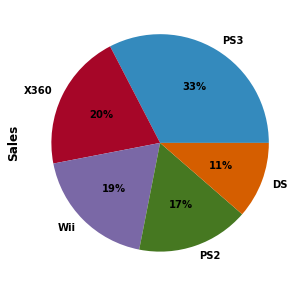

In [159]:
sales_by_region(top5_in_region('platform'))

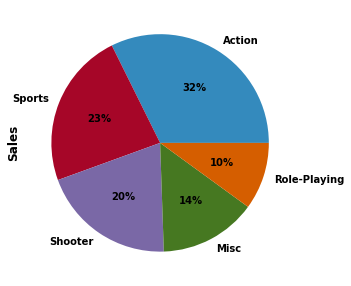

In [160]:
sales_by_region(top5_in_region('genre'))

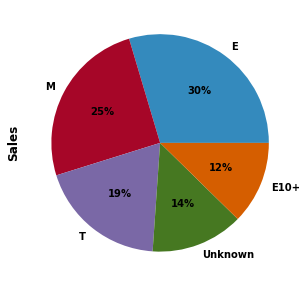

In [161]:
sales_by_region(top5_in_region('rating'))

#### Intermediate conclusion

In "Other rigions" situation is the same as in Europe.


## Conclusion <a href = "conclusion_regions"></a>

We can see that in North America, Europe and Japan different preferences in platforms. It can be because XBox is produced by Microsoft, PlayStation is producing in England and DS, if I'm not mistaken, in Japan.

In North America and Europe the same genre is popular, but in Japan it is different. It can be a good topic for crosscultural research.

In all regions gamers prefer to play in game for everyone.

## Hypothesis <a href = "hypo"></a>

*Difference between PS and XBox*

In [162]:
alpha_1 = .01
alpha_5 = .05


H(0) - Average user rating on platforms PS and XBox is the same
H(1) - Average user rating on platforms PS and XBox is not the same

In [163]:
ps = actual_games.query("platform == 'PC'").where((actual_games['user_score'] !=-1) & (actual_games['critic_score'] !=-1))
xb = actual_games.query("platform == 'xone'").where((actual_games['user_score'] !=-1) & (actual_games['critic_score'] !=-1))
print(np.var(ps['user_score']))
print(np.var(xone['user_score']))

results = st.ttest_ind(
    xone['user_score'],
    ps['user_score'],
    equal_var=True,
    nan_policy='omit'
)

print('p-value:', results.pvalue)

2.203445046314646
1.6672512883221242
p-value: 0.011969438378272244


In [164]:
if (results.pvalue < alpha_5):
    print("Average user rating on platforms PS and XBox is the same")
else:
    print("Average user rating on platforms PS and XBox is not the same")

Average user rating on platforms PS and XBox is the same


In [165]:
if (results.pvalue < alpha_1):
    print("Average user rating on platforms PS and XBox is the same")
else:
    print("Average user rating on platforms PS and XBox is not the same")

Average user rating on platforms PS and XBox is not the same


In [166]:
ps['user_score'].mean()

6.8613026819923375

In [167]:
xone['user_score'].mean()

6.47196261682243

#### Intermediate conclusion

We have that there is no difference between average user rating on platform PS and XBox. And mean() gives us the same result.


*Difference between genres 'Action' and 'Sports'*

H(0) - Average user rating between genres 'Action' and 'Sports' is the same
H(1) - Average user rating between genres 'Action' and 'Sports' is not the same

In [168]:
action = actual_games.query("genre == 'Action'").where((actual_games['user_score'] !=-1) & (actual_games['critic_score'] !=-1))
sports = actual_games.query("genre == 'Sports'").where((actual_games['user_score'] !=-1) & (actual_games['critic_score'] !=-1))

print(np.var(action['user_score']))
print(np.var(sports['user_score']))

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var=False,
    nan_policy='omit'
)

print('p-value:', results.pvalue)

1.7066031999961528
2.154952778882674
p-value: 7.3114197298411044e-06


In [169]:
if (results.pvalue < alpha_5):
    print("Average user rating between genres 'Action' and 'Sports' is the same")
else:
    print("Average user rating between genres 'Action' and 'Sports' is not the same")

Average user rating between genres 'Action' and 'Sports' is the same


In [170]:
if (results.pvalue < alpha_1):
    print("Average user rating between genres 'Action' and 'Sports' is the same")
else:
    print("Average user rating between genres 'Action' and 'Sports' is not the same")

Average user rating between genres 'Action' and 'Sports' is the same


In [171]:
action['user_score'].mean()

6.9374216651745755

In [172]:
sports['user_score'].mean()

6.600562851782365

There is no difference between average user rating in generes 'Action' and 'Sports'.

## Conclusion <a href = "conclusion"></a>

1. In a database, we have games which was released from 1980 to 2016 years. Most of the games were released in 2008-2009 years. From 1980 to 1993 games' production was just in the beginning that's way we have so small amount of released games.

2. Most of the games has score 0, no games have max score 10. Among other scores most popular high scores (7-8 stars).

3. The game "Need for speed" had more releases than other games. Was released almost for all platforms and few times reissued.

4. The most popular platforms is PS2, DS, PS3, Wii, X360, PSP. PS2 is no longer produced, that's why in 2017 year we can have changes. Sales probably will decrease for PS2 and increase for PS3 and/or PS4.

5. Most of the games in database have genre 'Action'. In this data we have just one genre related to a game, but many games can have more than one genre.

6. In 1990 - 2009 years production of videogames was growing. After 2009 it was falling.

7. During 10 years platform is on the market. During 5 years production are increasing after - decreasing.

8. Most of the sales were during 2005 - 2015 years.

9. Leaders in sales are PS3, X360 and Wii.

10. Next on market PS4 and XOne.

11. PS4 sales in about two years are twice as large as XOne.

12. There is no correlation between user scores and sales. A weak correlation between critical score and sales. There is a correlation between user and critical scores.

13. The most saleable genre is 'Shooter'. The worst - 'Adventure'.

14. In North America games for XBox for everyone and genre 'Action' is more popular.

15. In Europe games for PS3 for everyone and genre 'Action' is more popular.

16. In Japan games for DS platform, genre 'Role-Playing" is more popular. Also most of the games doesn't have ERSB rating.

17. In other regions the same results that in Europe.

18. The average user rating is the same for PS and XBox.

19. The average user rating is the same for genres 'Action' and 'Sports'

To have more clear results we need to have information about all regions where store sales games. Depending on the region we can have different results about most popular platforms, genres. And create promotion company based on a region, which probably should increase sales.
Also we don't know which games are for networking play and which are not. And if store sales such games. It also can change correlations.
